<a href="https://colab.research.google.com/github/chavezgranados/Operations-Research/blob/main/apps/s01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font face="gotham" color="green"> **INVESTIGACIÓN DE OPERACIONES: SESIÓN 1**</font>

`Luis Chávez`

![texto del vínculo](https://www.ot.mgt.tum.de/fileadmin/_processed_/1/b/csm_wordle_18_3baf101e55.webp)
"

In [ ]:
# ==============================================================================
# 1. Fundamentos de Python
# ==============================================================================

In [ ]:
# Variables y tipos de datos
x = 5
y = 3.2
texto = "Hola Investigación de Operaciones"

print("Entero:", x)
print("Decimal:", y)
print("Texto:", texto)

Entero: 5
Decimal: 3.2
Texto: Hola Investigación de Operaciones


In [ ]:
# Listas
numeros = [2, 4, 6, 8]
print("Lista:", numeros)

Lista: [2, 4, 6, 8]


In [ ]:
# Bucles
for n in numeros:
    print("Número:", n)

Número: 2
Número: 4
Número: 6
Número: 8


In [ ]:
# Funciones
def cuadrado(num):
    return num**2
print("El cuadrado de 4 es:", cuadrado(4))

El cuadrado de 4 es: 16


In [ ]:
# Librerías (ejemplo con numpy)
import numpy as np
vector = np.array([1, 2, 3])
print("Vector numpy:", vector)
print("Media del vector:", np.mean(vector))

Vector numpy: [1 2 3]
Media del vector: 2.0


In [ ]:
# ==============================================================================
# 1. Método Gráfico
# ==============================================================================

### **Ejemplo 1**

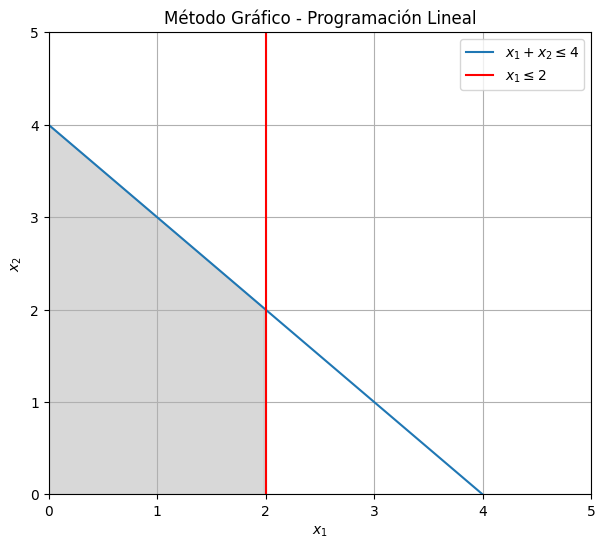

Vértices factibles: [(0, 0), (0, 4), (2, 0), (2, 2)]
En (0, 0), Z = 0
En (0, 4), Z = 8
En (2, 0), Z = 6
En (2, 2), Z = 10


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Rango de valores
x1 = np.linspace(0, 5, 200)

# Restricciones
x2_1 = 4 - x1        # x1 + x2 <= 4
x2_2 = np.full_like(x1, 0)  # x2 >= 0
x2_3 = np.full_like(x1, 0)  # x1 >= 0
x2_4 = np.full_like(x1, 0)  # dummy para graficar

# Dibujar restricciones
plt.figure(figsize=(7,6))
plt.plot(x1, x2_1, label=r"$x_1 + x_2 \leq 4$")
plt.axvline(x=2, color="r", label=r"$x_1 \leq 2$")

# Región factible
x2_factible = np.minimum(x2_1, 10)   # arriba infinito, ajustamos
plt.fill_between(x1, 0, x2_factible, where=(x1 <= 2), color="gray", alpha=0.3)

# Etiquetas
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.title("Método Gráfico - Programación Lineal")
plt.legend()
plt.grid(True)
plt.show()

# Evaluación de vértices
vertices = [(0,0), (0,4), (2,0), (2,2)]
print("Vértices factibles:", vertices)

# Función objetivo en cada vértice
for v in vertices:
    Z = 3*v[0] + 2*v[1]
    print(f"En {v}, Z = {Z}")


### **Ejemplo 2: maximización**

Considere el ejemplo 2.1-1 de Taha (2017):
    \begin{align*}
    \text{Maximizar }z & = 5x_1 + 4x_2 \\
     \text{sujeto a}  \\
    6x_1 + 4x_2 & \leq 24 \\
    x_1 + 2x_2 & \leq 6 \\
    -x_1 + x_2 & \leq 1 \\
    x_2 & \leq 2 \\
    x_1, x_2 & \geq 0
    \end{align*}

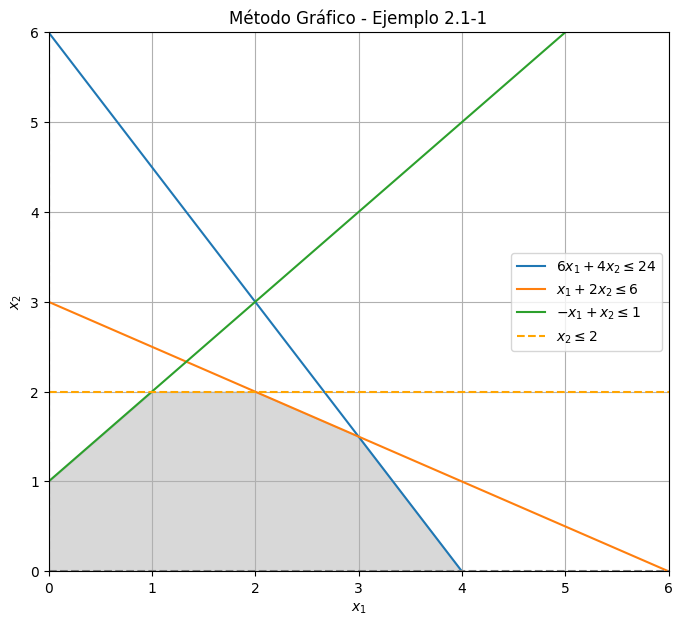

Feasible vertices: [(0, 0), (4, 0), (3, 1.5), (2, 2), (0, 1)]
En (0, 0), Z = 0
En (4, 0), Z = 20
En (3, 1.5), Z = 21.0
En (2, 2), Z = 18
En (0, 1), Z = 4


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Rango de valores for x1
x1 = np.linspace(0, 6, 400)

# Definir x2 en base a las restricciones
x2_c1 = (24 - 6 * x1) / 4  # 6x1 + 4x2 <= 24  => x2 <= 6 - 1.5*x1
x2_c2 = (6 - x1) / 2    # x1 + 2x2 <= 6   => x2 <= 3 - 0.5*x1
x2_c3 = x1 + 1         # -x1 + x2 <= 1   => x2 <= x1 + 1
x2_c4 = np.full_like(x1, 2)  # x2 <= 2
x2_c5 = np.full_like(x1, 0)  # x2 >= 0
x1_c5 = np.full_like(x1, 0)  # x1 >= 0

# Ploteo
plt.figure(figsize=(8, 7))
plt.plot(x1, x2_c1, label=r"$6x_1 + 4x_2 \leq 24$")
plt.plot(x1, x2_c2, label=r"$x_1 + 2x_2 \leq 6$")
plt.plot(x1, x2_c3, label=r"$-x_1 + x_2 \leq 1$")
plt.axhline(y=2, color="orange", linestyle='--', label=r"$x_2 \leq 2$")
plt.axvline(x=0, color="gray", linestyle='--') # x1 >= 0
plt.axhline(y=0, color="gray", linestyle='--') # x2 >= 0

x2_feasible_upper = np.minimum(x2_c1, x2_c2)
x2_feasible_upper = np.minimum(x2_feasible_upper, x2_c4)
x2_feasible_upper = np.minimum(x2_feasible_upper, x2_c3) # Also need to consider x2 <= x1 + 1
x2_feasible_lower = x2_c5 # x2 >= 0

# Región factible
plt.fill_between(x1, x2_feasible_lower, x2_feasible_upper, where=((x1 >= 0) & (x2_feasible_upper >= x2_feasible_lower)), color="gray", alpha=0.3)

# Etiquetas y título
plt.xlim(0, 6)
plt.ylim(0, 6)
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.title("Método Gráfico - Ejemplo 2.1-1")
plt.legend()
plt.grid(True)
plt.show()
vertices = [(0,0), (4,0), (3, 1.5), (2, 2), (0, 1)]
print("Feasible vertices:", vertices)

# FO y puntos factibles
for v in vertices:
    Z = 5 * v[0] + 4 * v[1]
    print(f"En {v}, Z = {Z}")

### **Ejemplo 3: minimización**

Considere el siguiente problema de programación lineal:
\begin{align*}
\text{Minimizar }z & = 4x_1 + 5x_2 \\
\text{sujeto a}  \\
x_1 + x_2 & \geq 7 \\
x_1 - 2x_2 & \leq 4 \\
-3x_1 + x_2 & \leq 3 \\
x_1, x_2 & \geq 0
\end{align*}

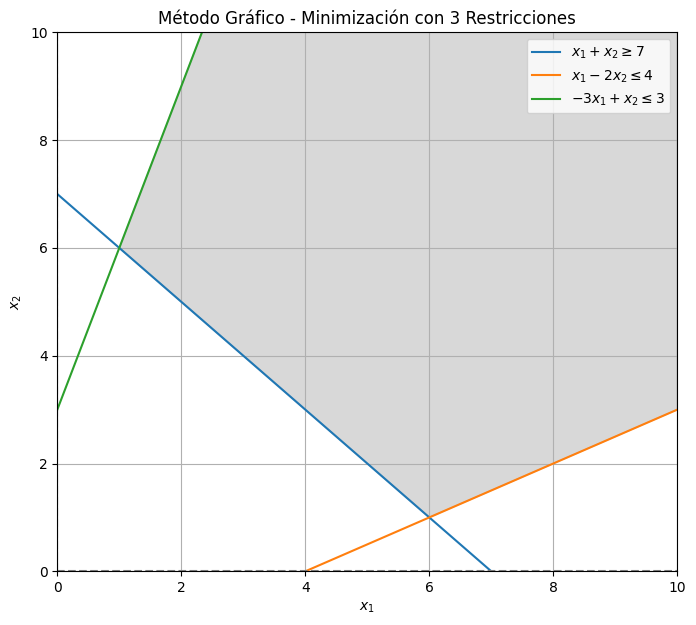

Feasible vertices: [(6, 1), (1, 6), (4, 0)]
En (6, 1), Z = 29
En (1, 6), Z = 34
En (4, 0), Z = 16


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Rango de valores for x1
x1 = np.linspace(0, 10, 400)

# Definir x2 basado en las restricciones
x2_c1 = 7 - x1       # x1 + x2 >= 7  => x2 >= 7 - x1
x2_c2 = (x1 - 4) / 2 # x1 - 2x2 <= 4 => -2x2 <= 4 - x1 => x2 >= (x1 - 4) / 2 (inequality flips when dividing by negative)
x2_c3 = 3 + 3*x1     # -3x1 + x2 <= 3 => x2 <= 3 + 3x1
x2_nonneg = np.full_like(x1, 0) # x2 >= 0

# Ploteo
plt.figure(figsize=(8, 7))
plt.plot(x1, x2_c1, label=r"$x_1 + x_2 \geq 7$")
plt.plot(x1, (x1 - 4) / 2, label=r"$x_1 - 2x_2 \leq 4$") # Plotting the boundary line
plt.plot(x1, 3 + 3*x1, label=r"$-3x_1 + x_2 \leq 3$") # Plotting the boundary line
plt.axvline(x=0, color="gray", linestyle='--') # x1 >= 0
plt.axhline(y=0, color="gray", linestyle='--') # x2 >= 0
x2_lower_bounds = np.maximum(x2_nonneg, x2_c1)
x2_lower_bounds = np.maximum(x2_lower_bounds, (x1 - 4) / 2)
x2_upper_bounds = 3 + 3*x1 # From -3x1 + x2 <= 3

# Región factible
plt.fill_between(x1, x2_lower_bounds, x2_upper_bounds, where=(x1 >= 0) & (x2_lower_bounds <= x2_upper_bounds), color="gray", alpha=0.3)

# Etiquetas y título
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.title("Método Gráfico - Minimización con 3 Restricciones")
plt.legend()
plt.grid(True)
plt.show()
vertices = [(6, 1), (1, 6), (4, 0)] # Vertices of the feasible region
print("Feasible vertices:", vertices)

# Evaluación de la FO en cada punto factible:
for v in vertices:
    Z = 4 * v[0] + 5 * v[1]
    print(f"En {v}, Z = {Z}")